In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
from random import sample
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
import seaborn as sns

def model_build(Subject):
    df = pd.read_excel('question2.xlsx',sheet_name=Subject)
    mdl1 = ols(formula='gIn ~ 1 + gOut + gOut:iOut', data=df)
    mdl1 = mdl1.fit()
    m1=mdl1.cov_params()
    print(m1)
    mse1=mdl1.mse_resid
    print(mse1)
    print(mdl1.summary())
    gOut = df['gOut']
    iOut = df['iOut']
    m=iOut*gOut
    print(np.corrcoef(df['gOut'],m))
    residuals = mdl1.resid
    y_fitted = mdl1.fittedvalues
    row = []
    for i in range(y_fitted.size): 
        row.append(i)
    fig = plt.figure(figsize=(10, 8))
    fig.suptitle('Glucose')
    ax1 = fig.add_subplot(2,2,1)
    ax1=sns.residplot(x=row, y=residuals)
    
    plt.title('Case order plot of residuals')
    plt.ylabel("Residuals")
    plt.xlabel("Row Number")
    ax2 = fig.add_subplot(2,2,2)
    ax2=sns.residplot(x=y_fitted, y=residuals)
    plt.title('Plot of residuals vs. fitted values')
    plt.ylabel('Residuals')
    plt.xlabel('Fitted Values')
    fig.tight_layout()
 



    ax3 = fig.add_subplot(2,2,3)
    ax3 = plt.hist(residuals,density=True) 
    plt.title('Histograms of residuals')
    plt.ylabel('Frequency')
    plt.xlabel('Residuals')

    ax4 = fig.add_subplot(2,2,4)
    prb = sm.ProbPlot(residuals)
    prb.qqplot(line='s',ax=ax4)
    plt.title(' Normal Probability Plot')
    fig.tight_layout()
    plt.show()

    
    
    
    mdl2 = ols(formula='iIn ~ 1 + gOut + iOut', data=df)
    mdl2 = mdl2.fit()
    residuals2 = mdl2.resid
    y_fitted2 = mdl2.fittedvalues
    row = []
    for i in range(y_fitted2.size):
        row.append(i)
    mse2=mdl2.mse_resid
    print(mse2)
    print(mdl2.summary())
    print(np.corrcoef(df['gOut'],df['iOut']))
    m2=mdl2.cov_params()
    print(m2)
    fig2 = plt.figure(figsize=(10, 8))
    fig2.suptitle('Insulin')
    ax1 = fig2.add_subplot(2,2,1)
    ax1=sns.residplot(x=row, y=residuals2)
    
    plt.title('Case order plot of residuals')
    plt.ylabel("Residuals")
    plt.xlabel("Row Number")
    ax2 = fig2.add_subplot(2,2,2)
    ax2=sns.residplot(x=y_fitted2, y=residuals2)
    plt.title('Plot of residuals vs. fitted values')
    plt.ylabel('Residuals')
    plt.xlabel('Fitted Values')
    fig.tight_layout()
    ax3 = fig2.add_subplot(2,2,3)
    ax3 = plt.hist(residuals2,density=True) 
    plt.title('Histograms of residuals')
    plt.ylabel('Frequency')
    plt.xlabel('Residuals')

    ax4 = fig2.add_subplot(2,2,4)
    prb = sm.ProbPlot(residuals2)
    prb.qqplot(line='s',ax=ax4)
    plt.title(' Normal Probability Plot')
    fig2.tight_layout()
    plt.show()



              Intercept          gOut     gOut:iOut
Intercept  2.827127e+06 -2.296150e+06 -1.345252e+07
gOut      -2.296150e+06  5.515462e+06 -3.067001e+07
gOut:iOut -1.345252e+07 -3.067001e+07  5.463369e+08
832987.957189761
                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     22.55
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.65e-05
Time:                        15:35:33   Log-Likelihood:                -163.08
No. Observations:                  20   AIC:                             332.2
Df Residuals:                      17   BIC:                             335.1
Df Model:                           2                                         
Covariance Type:            nonrobust                           

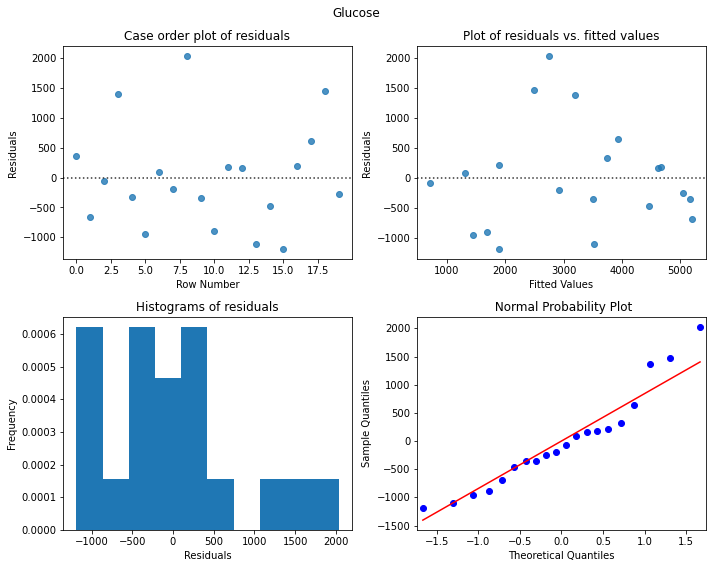

4865.12410133878
                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     46.38
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.30e-07
Time:                        15:35:35   Log-Likelihood:                -111.65
No. Observations:                  20   AIC:                             229.3
Df Residuals:                      17   BIC:                             232.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1099.7860    207.996   

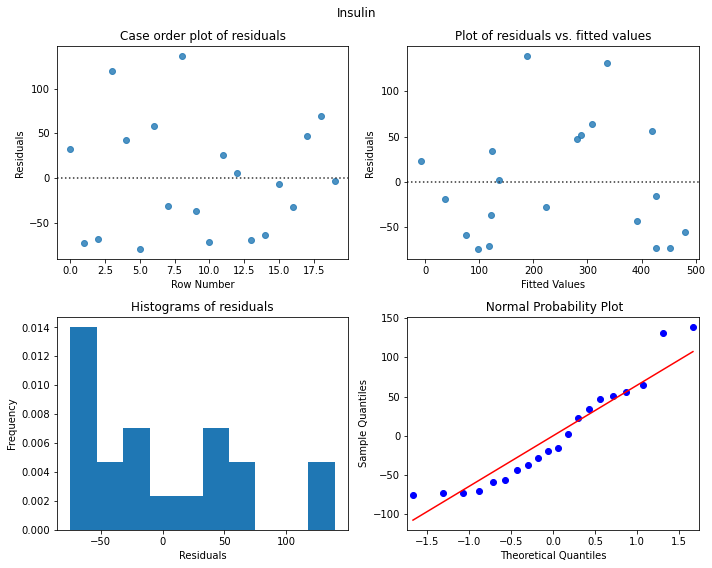

In [2]:
model_build("Subj0")

              Intercept          gOut     gOut:iOut
Intercept  2.694179e+06 -1.631501e+06 -1.368287e+07
gOut      -1.631501e+06  1.631625e+06 -3.123614e+06
gOut:iOut -1.368287e+07 -3.123614e+06  2.875238e+08
1191679.8804002875
                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     7.902
Date:                Fri, 29 Oct 2021   Prob (F-statistic):            0.00374
Time:                        15:35:36   Log-Likelihood:                -166.66
No. Observations:                  20   AIC:                             339.3
Df Residuals:                      17   BIC:                             342.3
Df Model:                           2                                         
Covariance Type:            nonrobust                         

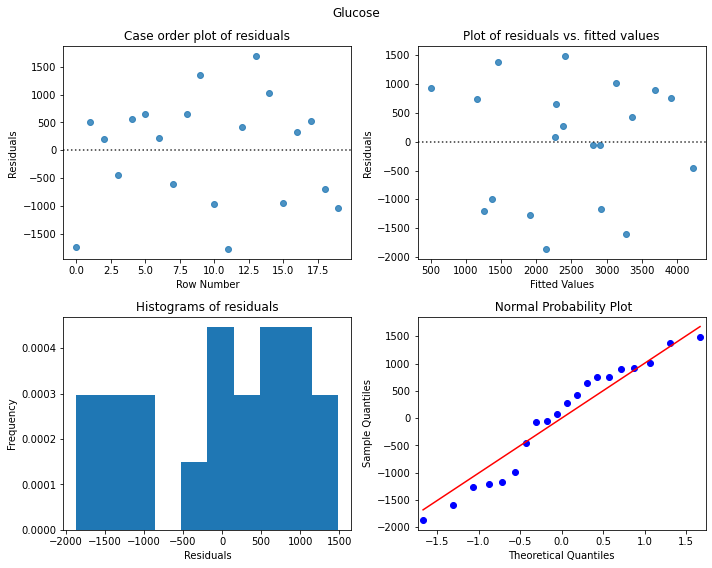

3311.6920992926584
                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     52.37
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           5.41e-08
Time:                        15:35:37   Log-Likelihood:                -107.81
No. Observations:                  20   AIC:                             221.6
Df Residuals:                      17   BIC:                             224.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    654.5212    119.087 

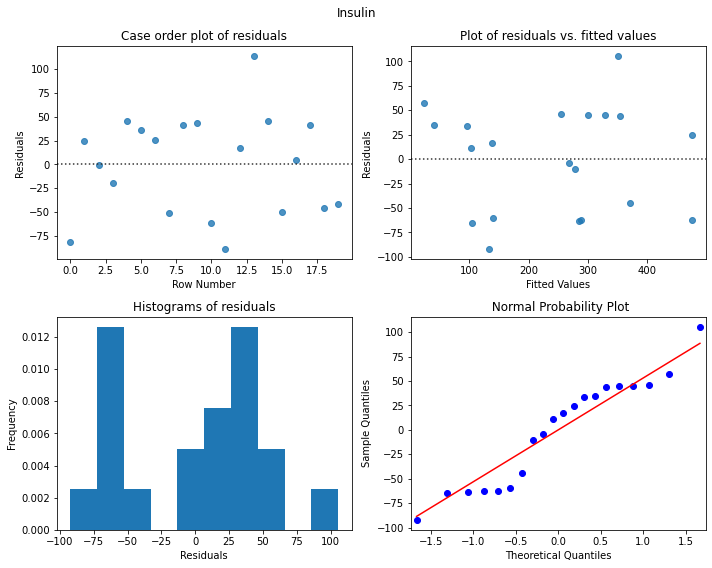

In [3]:
model_build("Subj1")


              Intercept          gOut     gOut:iOut
Intercept  2.753994e+06 -2.884431e+06  4.403944e+06
gOut      -2.884431e+06  3.234977e+06 -5.705445e+06
gOut:iOut  4.403944e+06 -5.705445e+06  1.272409e+07
134487.4624793968
                            OLS Regression Results                            
Dep. Variable:                    gIn   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     161.7
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           8.63e-12
Time:                        15:35:38   Log-Likelihood:                -144.85
No. Observations:                  20   AIC:                             295.7
Df Residuals:                      17   BIC:                             298.7
Df Model:                           2                                         
Covariance Type:            nonrobust                          

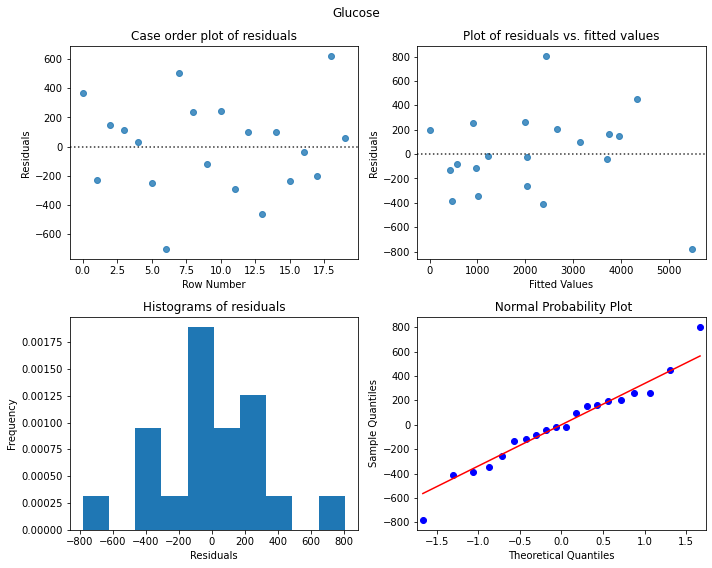

6293.737779654213
                            OLS Regression Results                            
Dep. Variable:                    iIn   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     13.51
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           0.000308
Time:                        15:35:39   Log-Likelihood:                -114.23
No. Observations:                  20   AIC:                             234.5
Df Residuals:                      17   BIC:                             237.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    909.8093    248.396  

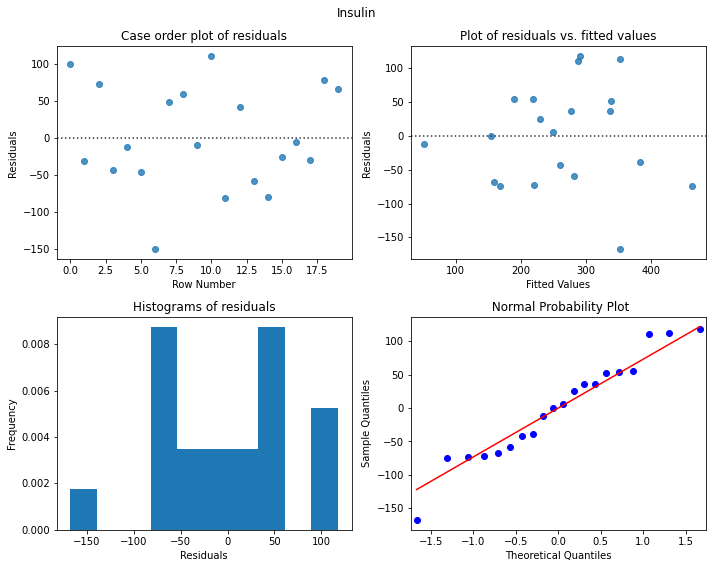

In [4]:
model_build("Subj2")